# EDA

## Goal: 
Provide insight on the difference's between accounts that paid a balance vs. accounts that did not pay at all. 

### Data: 
- import our cleaned dataset `Data_cleaned.csv` 
    - comprises of the below dataset: 
        - `DB_Accounts_2012-2015.txt`
        - `DB_Entities.txt`
        - `DB_Entities_Additional.txt`
        - `DB_Purchases.txt`
        - `DB_Splits.txt`
        - `uszips.csv`
       


# Obtaining the Data 

In [4]:
import pandas as pd 
import sys
import pandas_profiling 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('Data_June24.csv')

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data.columns

Index(['Account_ID', 'Entity_ID', 'Seller_Type', 'Creditor_Name',
       'Closure_Type', 'Entity_City', 'Entity_State', 'Entity_Zip',
       'Median_Household_Income', 'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'Invoice_bal', 'Age', 'Target', 'Income_level',
       'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age', 'Paid',
       'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range', 'Education_college', 'Education_highschool'],
      dtype='object')

# Age 
---

We binned the ages into 16 categories 
- `18-21` 
- `22-24` 
- `25-29` 
- `30-34`
- `35-39`
- `40-44`
- `45-49`
- `50-54`
- `55-59`
- `60-64`
- `65-69`
- `70-74`
- `75-79`
- `80-84`
- `85-89`
- `90 and above`

Creating paid and unpaid data set 

In [8]:
#creating paid and unpaid dataset
paid = data[(data.Closure_Type == 'SETTLE') | (data.Closure_Type == 'PIF')]
unpaid = data[(data.Closure_Type != 'SETTLE') & (data.Closure_Type != 'PIF')]

## Sample Questions - Of the accounts that paid, 
1. What is the average invoice balance? 
2. What is the average paid amount? 
3. What is the median house hold income?


## Age specific questions:
1. Which age range paid the most in terms of dollar amount? and, what is the avg.invoice balance? 
2. Which age range paid the most in terms of percentage, within the category? 


In [9]:
paid_groupby_age = paid.groupby(by=['Age_range'])
unpaid_groupby_age = unpaid.groupby(by=['Age_range'])
total_groupby_age = data.groupby(by=['Age_range'])

In [10]:
paid_mean = paid_groupby_age.mean()
paid_count = paid_groupby_age.count()
unpaid_mean = unpaid_groupby_age.mean()
unpaid_count = unpaid_groupby_age.count()

In [11]:
#sort values by age range 
paid_df = paid.sort_values(by='Age_range')
unpaid_df = unpaid.sort_values(by='Age_range')

In [12]:
#Creating a list with age range labels and values for paid, unpaid and total 
age_range = paid_df.Age_range.unique()

paid_age_range_values =[]
unpaid_age_range_values = []
total_age_range_values = []

for i in age_range: 
    y = len(paid_df[paid_df.Age_range == i])
    paid_age_range_values.append(y)
    
for i in age_range: 
    y = len(unpaid_df[unpaid_df.Age_range == i])
    unpaid_age_range_values.append(y)    
    
for i in age_range: 
    y = len(data[data.Age_range == i])
    total_age_range_values.append(y)


In [13]:
print('Paid: ',len(paid_df))
print('Total:',len(data))
print('Percentage:', (round((len(paid_df) / len(data))*100 ,2)),'%')

Paid:  556536
Total: 12713917
Percentage: 4.38 %


## Quantity of Accounts by Age Range 

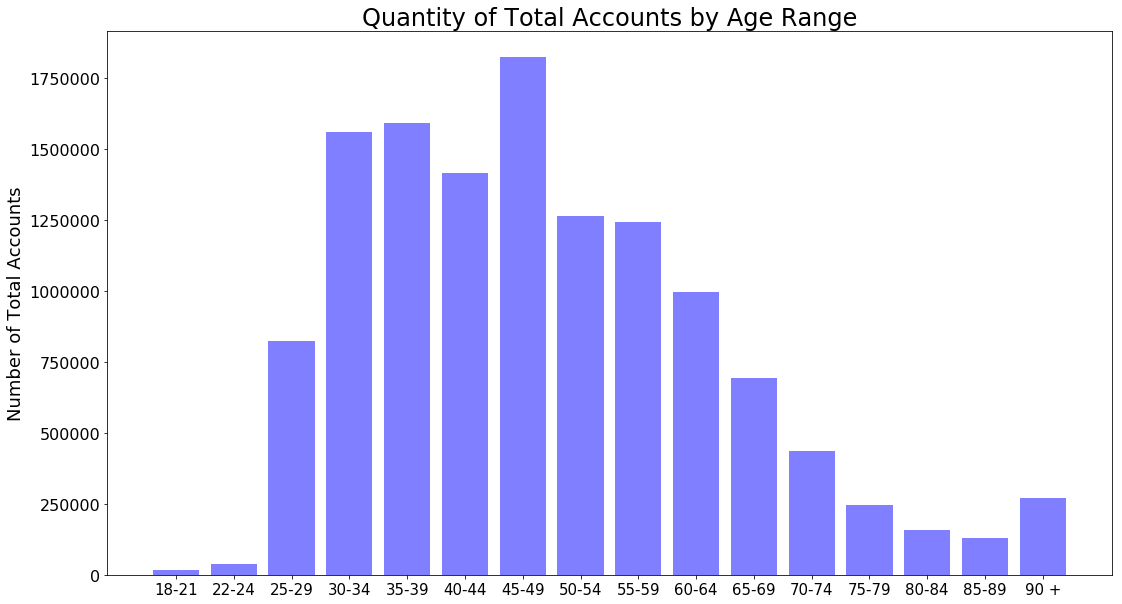

In [14]:
# Create the plot bars
# In x position
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        total_age_range_values, 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='blue',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Number of Total Accounts', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Quantity of Total Accounts by Age Range', fontsize=24)

plt.savefig('qty_total_account_by_age_range.png' , dpi=300)

plt.show()

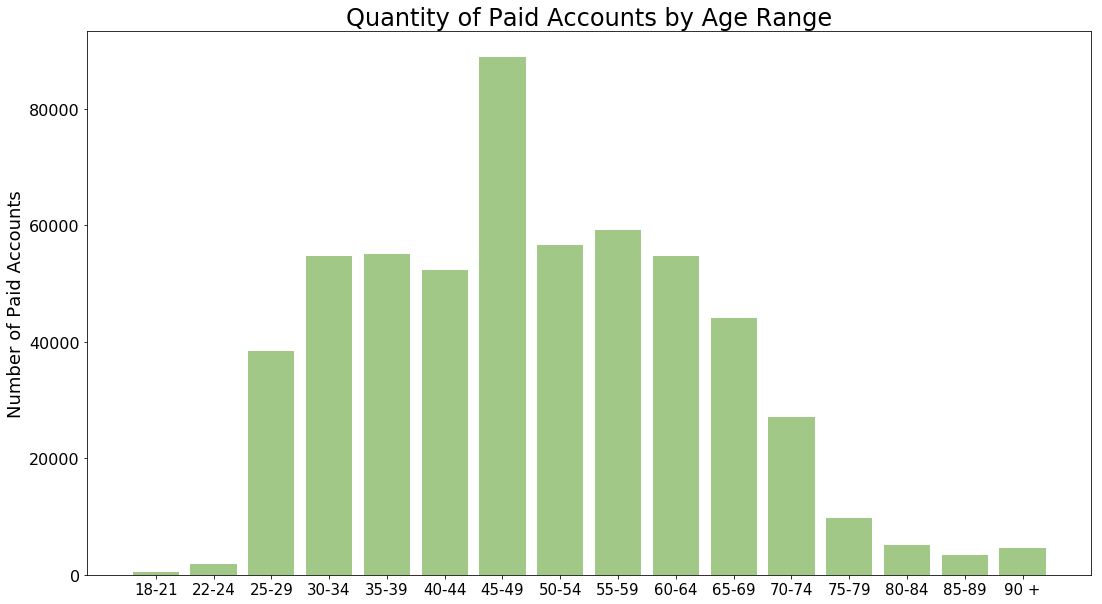

In [15]:
# Create the plot bars
# In x position
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        paid_age_range_values, 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#469212ff',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Number of Paid Accounts', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Quantity of Paid Accounts by Age Range', fontsize=24)

plt.show()


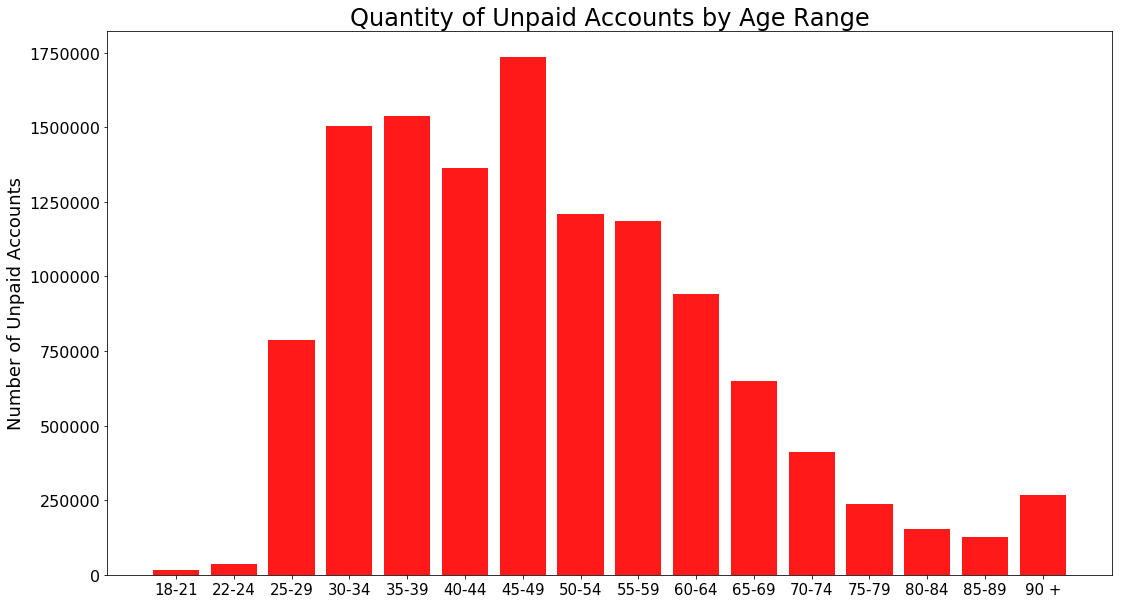

In [17]:
# Create the plot bars
# In x position
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        unpaid_age_range_values, 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='red',
        # alpha 0.5
        alpha=0.9)

# set axes labels and title
plt.ylabel('Number of Unpaid Accounts', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Quantity of Unpaid Accounts by Age Range', fontsize=24)

plt.show()

In [18]:
a = np.array(paid_age_range_values)
b = np.array(total_age_range_values)
percent_paid = a / b

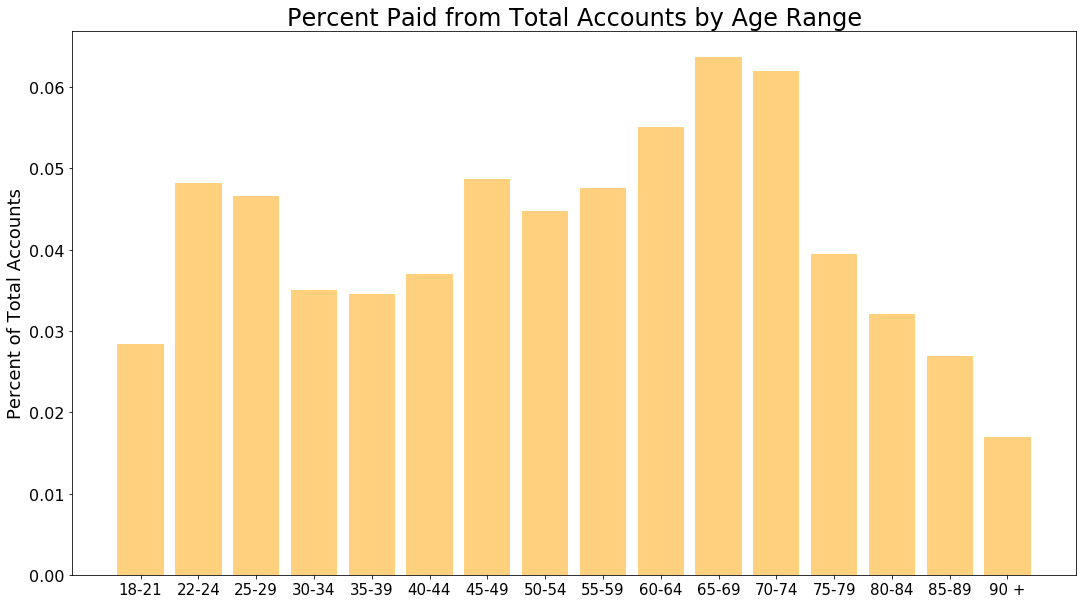

In [19]:
# Create the plot bars
# In x position
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        percent_paid, 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='orange',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Percent of Total Accounts', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Percent Paid from Total Accounts by Age Range', fontsize=24)

plt.show()

### What is the average balance of total accounts? 

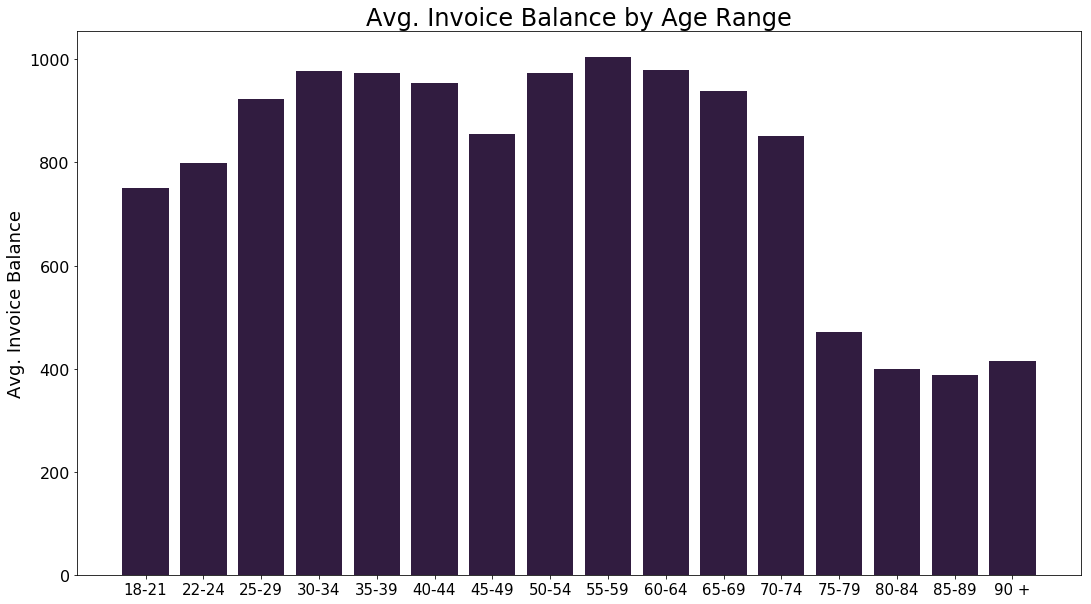

In [20]:
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        total_groupby_age.Invoice_bal.mean(), 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#311C40',
        # alpha 0.5
        alpha=1)

# set axes labels and title
plt.ylabel('Avg. Invoice Balance', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Avg. Invoice Balance by Age Range', fontsize=24)

plt.show()

### What is the average balance of paid accounts? 

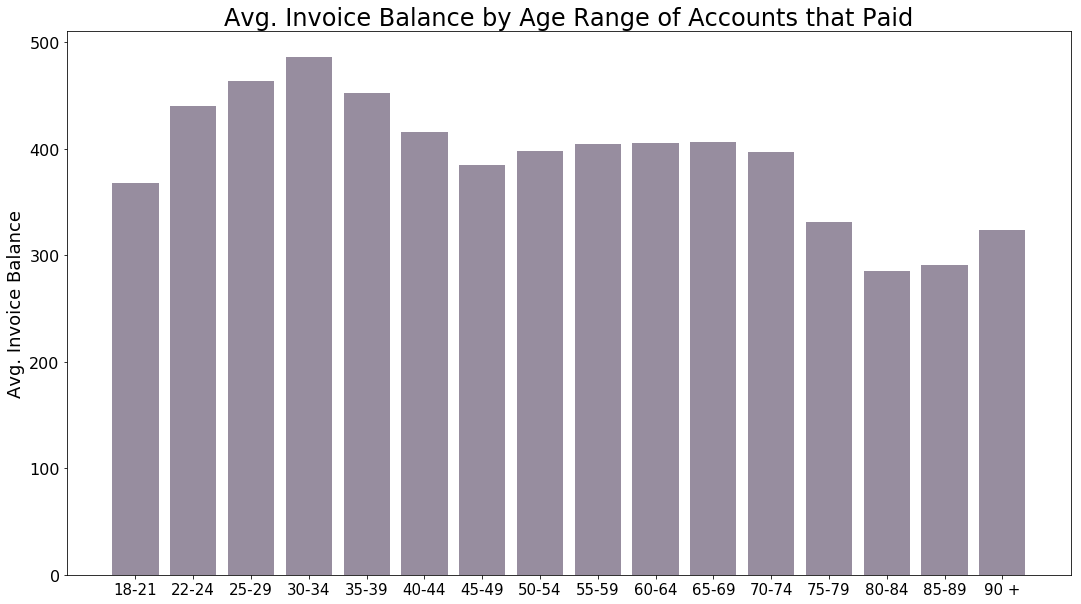

In [21]:
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        paid_groupby_age.Invoice_bal.mean(), 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#311C40',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Avg. Invoice Balance', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Avg. Invoice Balance by Age Range of Accounts that Paid', fontsize=24)

plt.show()

In [ ]:
paid_groupby_age.Invoice_bal.mean()

### What is the average collected within the age range? 


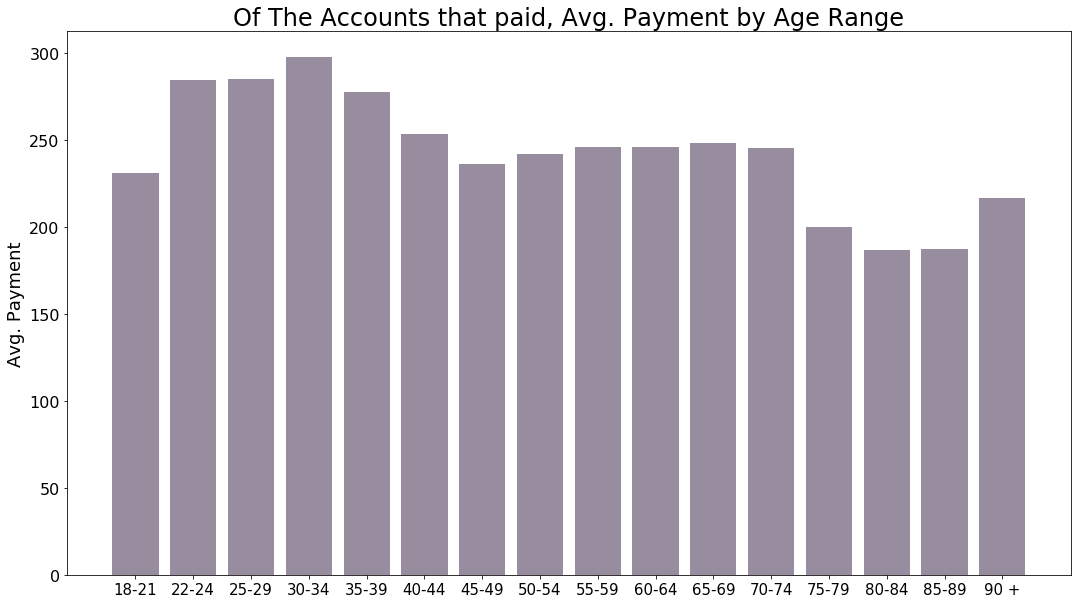

In [22]:
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        paid_groupby_age.Total_Paid.mean(), 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#311C40',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Avg. Payment', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Of The Accounts that paid, Avg. Payment by Age Range', fontsize=24)

plt.show()

In [23]:
paid_groupby_age.Total_Paid.mean()

Age_range
18-21    231.378592
22-24    284.926917
25-29    285.273071
30-34    297.899945
35-39    278.022464
40-44    253.671041
45-49    236.463813
50-54    242.258159
55-59    246.348483
60-64    246.388457
65-69    248.688304
70-74    245.662268
75-79    200.030902
80-84    186.740654
85-89    187.437382
90 +     216.861679
Name: Total_Paid, dtype: float64

### What is the total amount paid by age range? 

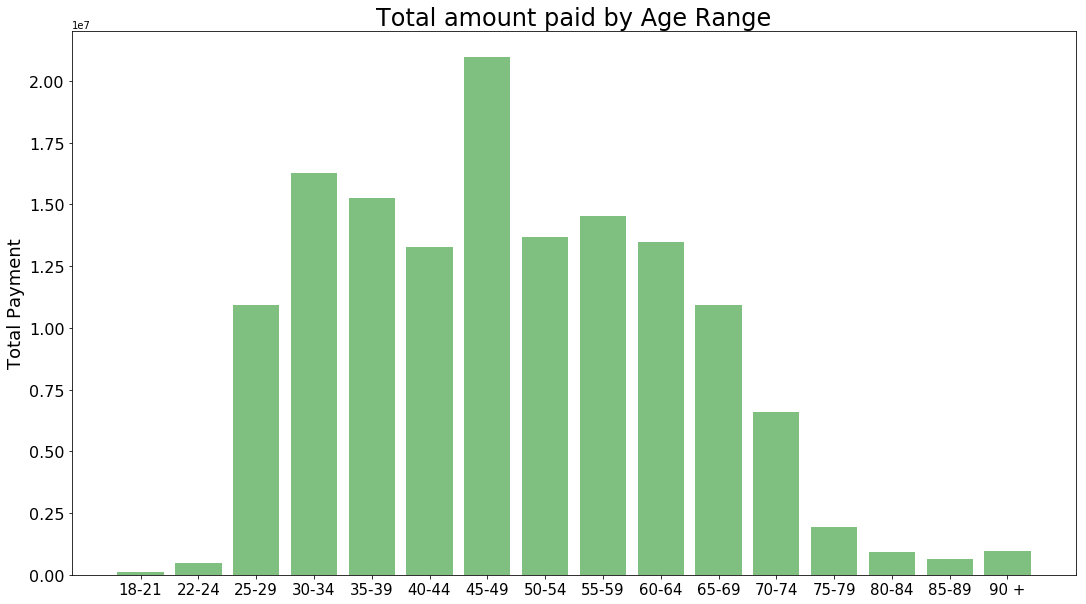

In [24]:
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        paid_groupby_age.Total_Paid.sum(), 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='green',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Total Payment', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Total amount paid by Age Range', fontsize=24)

plt.show()

In [25]:
paid_groupby_age.Total_Paid.sum()

Age_range
18-21      113375.51
22-24      497197.47
25-29    10912265.51
30-34    16259676.92
35-39    15271217.92
40-44    13263951.41
45-49    20964881.70
50-54    13698972.14
55-59    14531357.95
60-64    13457491.15
65-69    10932586.53
70-74     6608560.66
75-79     1927897.83
80-84      936877.86
85-89      642160.47
90 +       976745.00
Name: Total_Paid, dtype: float64

#### Observations:
---

1. In terms of quantity of total accounts by age range, age `45-49` has the most number of accounts, and the has the most number of accounts that paid. 
    - Number of Paid Accounts: 88,890 or 4.86%
    - Avg. Invoice Balance of The Accounts that Paid: \\$385.14
    - Avg. collected: \\$236.46
    - Total collected: \\$20,964,881.70
    
    
2. In second place, in terms of number of accounts that paid by age range, is `55-59`. 
    - Number of Paid Accounts: 59,141 or 4.74%
    - Avg. Invoice Balance of The Accounts that Paid: \\$404.09
    - Avg. collected: \\$246.34
    - Total collected: \\$14,531,357.95
    
    
3. In third place, in terms of number of accounts that paid by age range, is `50-54`.
    - Number of Paid Accounts: 59,141 or 4.45%
    - Avg. Invoice Balance of The Accounts that Paid: \\$385.14
    - Avg. collected: \\$242.25
    - Total collected: \\$13,698,972.14
    
 
 
**Intersting Find:** 

4. Behind age range `45-49`, age `30-34` has the second most collected amount of \\$16,259,676.92. 
    - Number of Paid Accounts: 54,709 or 3.46%
    - Avg. Invoice Balance of The Accounts that Paid: \\$486.16
    - Avg. collected: \\$297.89
    - Total collected: \\$16,259,676.92.
---

#### Age 45-49
Let's look deeper into paid accounts within the age range `45-49` 

In [ ]:
df_groupby = paid.groupby(['Age_range', 'Seller_Type', 'Income_level'])['Total_Paid'].size().reset_index()
df_total_groupby = data.groupby(['Age_range', 'Seller_Type', 'Income_level'])['Total_Paid'].size().reset_index()

In [ ]:
paid_45_49 = df_groupby[df_groupby.Age_range == '45-49']
paid_45_49.rename(columns={'Total_Paid': 'Count'}, inplace=True)
paid_45_49

In [ ]:
total_45_49 = df_total_groupby[df_total_groupby.Age_range == '45-49']
total_45_49.rename(columns={'Total_Paid': 'Count'}, inplace=True)
total_45_49

In [ ]:
a = paid.groupby(['Age_range', 'Seller_Type', 'Income_level','Target','Total_Paid'])

In [ ]:
b = a.size().reset_index(name='Count')

In [ ]:
b[(b.Age_range == '45-49') & (b.Seller_Type == 'AMBULANCE')]

# Age_range & Unemployment_rate 
---


In [ ]:
#creating a function to bin ages 
def unemployment_rate(row):

    if row >= 0 and row < 3: 
        return ('0-2.9%')
    elif row >= 3 and row < 5:
        return ('3-4.9%')
    elif row >= 5 and row < 7: 
        return ('5-6.9%')
    elif row >= 7 and row < 9: 
        return ('7-8.9%')
    elif row >= 9 and row < 11: 
        return ('9-10.9%')
    elif row >= 11 and row < 15: 
        return ('11-14.9%')
    elif row >= 15 and row < 20: 
        return ('15-19.9%')
    elif row >= 20 and row < 30:
        return ('20-29.9%')
    elif row >= 30 and row < 40: 
        return ('30-39.9%')
    elif row >= 40 and row < 50: 
        return ('40-49.9%')
    else: 
        return ('50%+')

In [ ]:
paid['Unemply_rate_range'] = paid.unemployment_rate.apply(unemployment_rate)
unpaid['Unemply_rate_range'] = unpaid.unemployment_rate.apply(unemployment_rate)

In [ ]:
a = paid.groupby(['Age_range', 'Unemply_rate_range'])['Total_Paid'].size().reset_index()
a.rename(columns={'Total_Paid': 'Total_Paid_Count'}, inplace=True)

b = unpaid.groupby(['Age_range', 'Unemply_rate_range'])['Total_Paid'].size().reset_index()
b.rename(columns={'Total_Paid' : 'Unpaid_Count'}, inplace=True)

In [ ]:
b[b.Age_range=='45-49']

In [ ]:
ab = pd.merge(b, a, on=['Age_range','Unemply_rate_range'])

In [ ]:
ab['Percent_Paid'] = round((ab.Total_Paid_Count / ab.Unpaid_Count)*100, 2)
ab.head()

#### Age_range `30-34`

In [ ]:
ab[ab.Age_range =='30-34'].sort_values('Percent_Paid', ascending=False)

#### Age_range `45-49`

In [ ]:
ab[ab.Age_range =='45-49'].sort_values('Total_Paid_Count', ascending=False)

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=3)

In [ ]:
ab.Age_range.unique()

for i in ab.Age_range.unique(): 
    x = ab[ab.Age_range == i].sort_values('Total_Paid_Count', ascending=False)
    pp.pprint(x)
    print('\n')

# Dealing with null values 
--- 


## Dealing with null values - Paid dataset 

In [ ]:
paid.isna().sum()

In [ ]:
paid.shape

We are comfortable in removing the null values because we're only deleting less than 0.5% of the data. 

In [ ]:
paid.dropna(inplace=True)

# Age_range - Unemployment_rate - Labor_force_participation - Income_level
---

In [ ]:
#creating a function to bin ages 
def labor_force(row):

    if row >= 0 and row < 20: 
        return ('lower_than_20')
    elif row >= 20 and row < 30:
        return ('20-29.9%')
    elif row >= 30 and row < 40: 
        return ('30-39.9%')
    elif row >= 40 and row < 50: 
        return ('40-49.9%')
    elif row >= 50 and row < 53: 
        return ('50-52.9%')
    elif row >= 53 and row < 56: 
        return ('53-55.9%')
    elif row >= 56 and row < 59: 
        return ('56-58.9%')
    elif row >= 59 and row < 62:
        return ('59-61.9%')
    elif row >= 62 and row < 65: 
        return ('62-64.9%')
    elif row >= 65 and row < 68: 
        return ('65-67.9%')
    elif row >= 68 and row < 71: 
        return ('68-70.9%')
    elif row >= 71 and row < 74:
        return ('71-73.9%')
    elif row >= 74 and row < 77: 
        return ('74-76.9%')
    elif row >= 77 and row < 80: 
        return ('77-79.9%')
    else: 
        return ('80%+')

In [ ]:
paid['Labor_force_part_range'] = paid.labor_force_participation.apply(labor_force)
unpaid['Labor_force_part_range'] = unpaid.labor_force_participation.apply(labor_force)

In [ ]:
c = paid.groupby(['Age_range', 'Unemply_rate_range','Labor_force_part_range','Income_level'])['Total_Paid'].size().reset_index()
c.rename(columns={'Total_Paid': 'Total_Paid_Count'}, inplace=True)

d = unpaid.groupby(['Age_range', 'Unemply_rate_range','Labor_force_part_range','Income_level'])['Total_Paid'].size().reset_index()
d.rename(columns={'Total_Paid' : 'Unpaid_Count'}, inplace=True)

In [ ]:
c[(c.Age_range== '45-49') & (c.Total_Paid_Count >= 2000)]

In [ ]:
cd = pd.merge(d, c, on=['Age_range','Unemply_rate_range','Labor_force_part_range', 'Income_level'])

In [ ]:
cd['Percent_Paid'] = round((cd.Total_Paid_Count / cd.Unpaid_Count)*100, 2)

In [ ]:
paid[paid.Age_range == '45-49'].shape

In [ ]:
cd[(cd.Age_range=='45-49')]

In [ ]:
cd[(cd.Age_range=='45-49') & (cd.Total_Paid_Count >=100) & (cd.Percent_Paid >=10)]

In [ ]:
x = cd[(cd.Age_range=='45-49') & (cd.Total_Paid_Count >=1000)]

In [ ]:
x

In [ ]:
x.Total_Paid_Count.sum()

Above we've grouped our selection using the features below: 

**Input:**
- Age_range = '45-49'
- Umemployment rate range
- Labor force participation range 
- Income level
- Total Paid Accounts (count) with Greater than or eaqual to 1000 

**Observations:** 
- Within the age range 45-49, we have roughly 84k accounts that paid. Using the four differnt features there were a total of 404 different combinations, and 13 of them accounted for 35k accounts or 39%. 


**Recommendation:** 
- Prioritize collection where the majority using the 13 combinations first, then collect from others. 
- That way you can spend less attention on the 13 combinations because they have a higher likehood of paying, and work the other accounts that has less likely likehood of paying, but that are not too far gone. 
- Prioritize on accounts that has historical successes of 10%+ `Percent_Paid`

In [ ]:
data.columns

# Education
---


In [ ]:
#creating a function to bin ages 
def college(row):

    if row >= 0 and row <= 5: 
        return ('0-5%')
    elif row > 5 and row <= 10:
        return ('5-10%')
    elif row > 10 and row <= 15: 
        return ('10-15%')
    elif row > 15 and row <= 20: 
        return ('15-20%')
    elif row > 20 and row <= 25: 
        return ('20-25%')
    elif row > 25 and row <= 30: 
        return ('25-30%')
    elif row > 30 and row <= 35: 
        return ('30-35%')
    elif row > 35 and row <= 40: 
        return ('35-40%')
    elif row > 40 and row <= 45: 
        return ('40-45%')
    elif row > 45 and row <= 50: 
        return ('45-50%')
    elif row > 50 and row <= 55: 
        return ('50-55%')
    elif row > 55 and row <= 60: 
        return ('55-60%')
    elif row > 60 and row <= 65: 
        return ('60-65%')
    elif row > 65 and row <= 70: 
        return ('65-70%')
    else:
        return ('70%+')

In [ ]:
paid['Education_college'] = paid.education_college_or_above.apply(college)
unpaid['Education_college'] = unpaid.education_college_or_above.apply(college)

In [ ]:
e = paid.groupby(['Age_range','Education_college' ,'Unemply_rate_range','Income_level'])['Total_Paid'].size().reset_index()
e.rename(columns={'Total_Paid': 'Total_Paid_Count'}, inplace=True)

f = unpaid.groupby(['Age_range','Education_college' ,'Unemply_rate_range','Income_level'])['Total_Paid'].size().reset_index()
f.rename(columns={'Total_Paid' : 'Unpaid_Count'}, inplace=True)

In [ ]:
ef = pd.merge(f,e, on=['Age_range','Education_college' ,'Unemply_rate_range','Income_level'], )
ef['Percent_Paid'] = round((ef.Total_Paid_Count / ef.Unpaid_Count)*100, 2)

In [ ]:
ef[(ef.Age_range =='45-49') & (ef.Total_Paid_Count >=1000)]

# Seller_Type 
--- 
Below is a comparison of `Seller_Type`

In [ ]:
seller_type = dataSeller_Type

In [ ]:
seller_type.head()